<a href="https://colab.research.google.com/github/dell-datascience/Inage_classifier/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from os import listdir
import re
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import seaborn as sb
%config InlineBackend.figure_format = 'retina'
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/research/
# %cd frenkel_pairs 
% ls-l

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/research
total 12
drwx------ 12 root root 4096 Jan  4 18:57 100_frame_clusters/
drwx------  2 root root 4096 Jan  2 16:45 frenkel_pairs/
drwx------  2 root root 4096 Jan  3 09:44 graphs/


In [4]:
files=list(listdir('/content/drive/MyDrive/research/frenkel_pairs'))   #Return a list containing the names of the files in the directory
def convert(str):
    return int("".join(re.findall("\d", str)))                     #isolate the digits
files.sort(key=convert)                                            #use digits as key to sort
# files
results_dic={} 
time=[]                                                            #dictionary
vals=[]                                                            #list
for idx in range(0,len(files),1):                                  #loop through all the files
  data=open(files[idx],'r')                                        #open each file
  for line in data:                                                #loop through each line in file
    if line[0]== '#' :continue                                     #skip the header 
    vals.append(int(line.split(" ")[5]))                           #split and take 6 element of each line and append to list
  results_dic[files[idx]]=results_dic.get(files[idx],vals)         #make key and append list to key
  vals=[]                                                          #empty out list
results_dic                                                            
data=open(files[0],'r')
for line in data:
  if line[0]=='#' : continue
  time.append(int(line.split(" ")[1])*.001)                                               

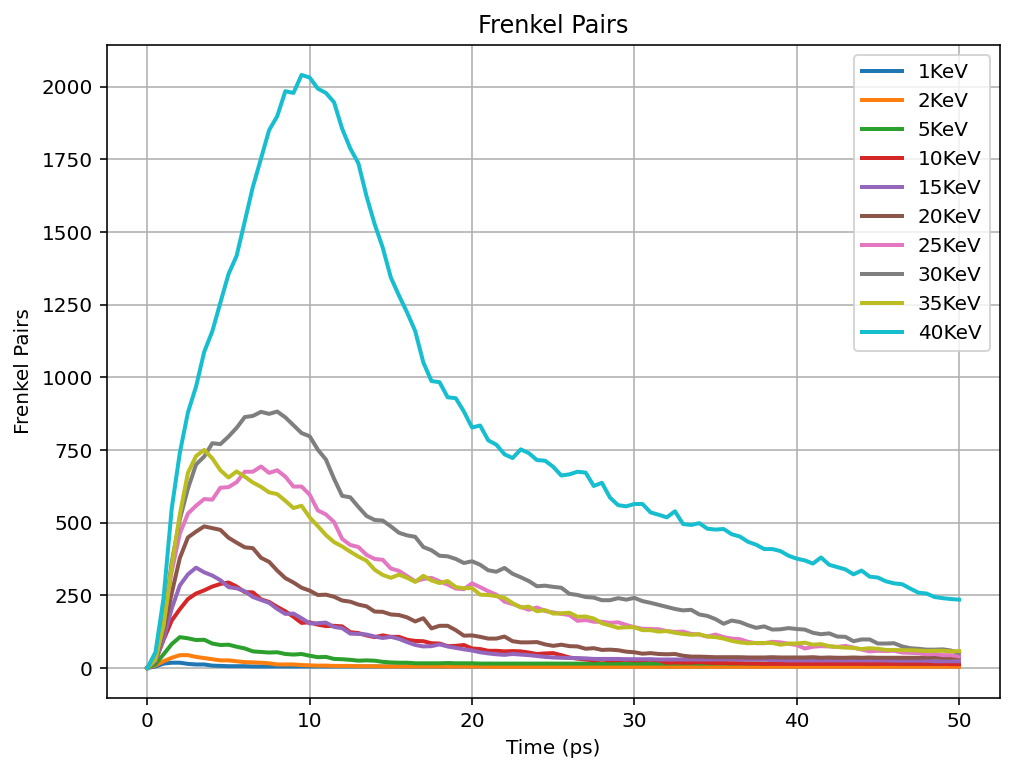

In [123]:
labe=sorted(results_dic.keys()) 
fig, ax =plt.subplots(figsize=(8,6))
for key,val in results_dic.items():
   ax.plot(time,results_dic[key],linewidth=2, label=key)
   ax.set_xlabel('Time (ps)')
   ax.set_ylabel('Frenkel Pairs')
   ax.set_title( 'Frenkel Pairs')
   ax.legend(facecolor ='white')
ax.grid(which='major',axis='both')
plt.savefig('frenkel_pairs_graph.png',dpi=2000)
plt.show()

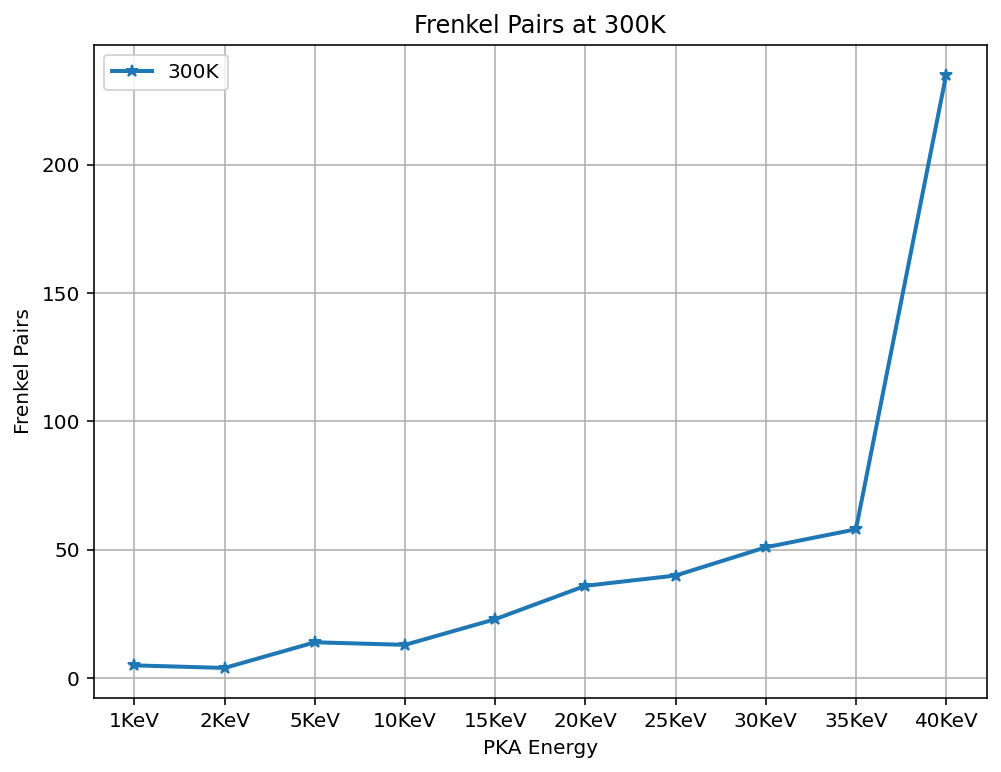

In [159]:
labe=sorted(results_dic.keys()) 
fig, ax =plt.subplots(figsize=(8,6))
y=[]
x=[]
for key,val in results_dic.items():
  y.append(results_dic[key][-1])
  x.append(key)
ax.plot(x,y, linewidth=2,marker='*', label='300K')
ax.set_xlabel('PKA Energy')
ax.set_ylabel('Frenkel Pairs')
ax.set_title( 'Frenkel Pairs at 300K')
ax.legend(facecolor ='white')
ax.grid(which='Major',axis='both')
plt.savefig('frenkel_pairs_graph.png',dpi=2000)
plt.show()

In [235]:
dir='/content/drive/MyDrive/research/100_frame_clusters/'
%cd '/content/drive/MyDrive/research/100_frame_clusters/'
results_dic={}
folders=listdir(dir) 
def convert(str):
    return int("".join(re.findall("\d", str)))                    
folders.sort(key=convert)                                                            #rearrange folders in ascending order
folders
val=[x for x in listdir(dir+folders[0]) if int("".join(re.findall("\d", x))) ==100]     #select file to analyze
val[0]
for idx in range(0,len(folders),1):
  folders2=listdir(dir+folders[idx])
  folders2.sort(key=convert)
  # files
  for file in folders2:  
    if file == val[0]:
      with open(dir+folders[idx]+'/'+file,'r') as rt:
        x=[int(float(x)) for x in rt if float(x)>0] 
        results_dic[idx]=results_dic.get(idx,x) 
L=results_dic[9]
val = list(zip(*np.unique(L, return_counts=True)))          #count frequency of data (data,frequency)
ylb=[y for x,y in val]                                      #take the frequency NB: whichbecomes the ylabel of graph

def graph(data,i):
  base=sb.color_palette()[3]
  ax=plt.subplots(figsize=(8,6));
  sb.countplot(data=data,x=i,color=base);
  plt.xlabel('Cluster Size')
  plt.ylabel('Frequency')
  plt.title(folders[9].split('_')[0]+' Cluster Size Analysis')
  L=results_dic[i]
  val = list(zip(*np.unique(L, return_counts=True)))          #count frequency of data (data,frequency)
  ylb=[y for x,y in val]                                      #take the frequency NB: whichbecomes the ylabel of graph
  for i in range(len(ylb)):                                   #loop through frequency 
    plt.text(i-0.2,ylb[i]+1.5, str(ylb[i]),va='center')       #label the bar charts 
  plt.savefig('Cluster_Size_Analysis {}'.format(9))
  plt.show()
  return None
# for i in range(9):
graph(results_dic,9)

/content/drive/MyDrive/research/100_frame_clusters


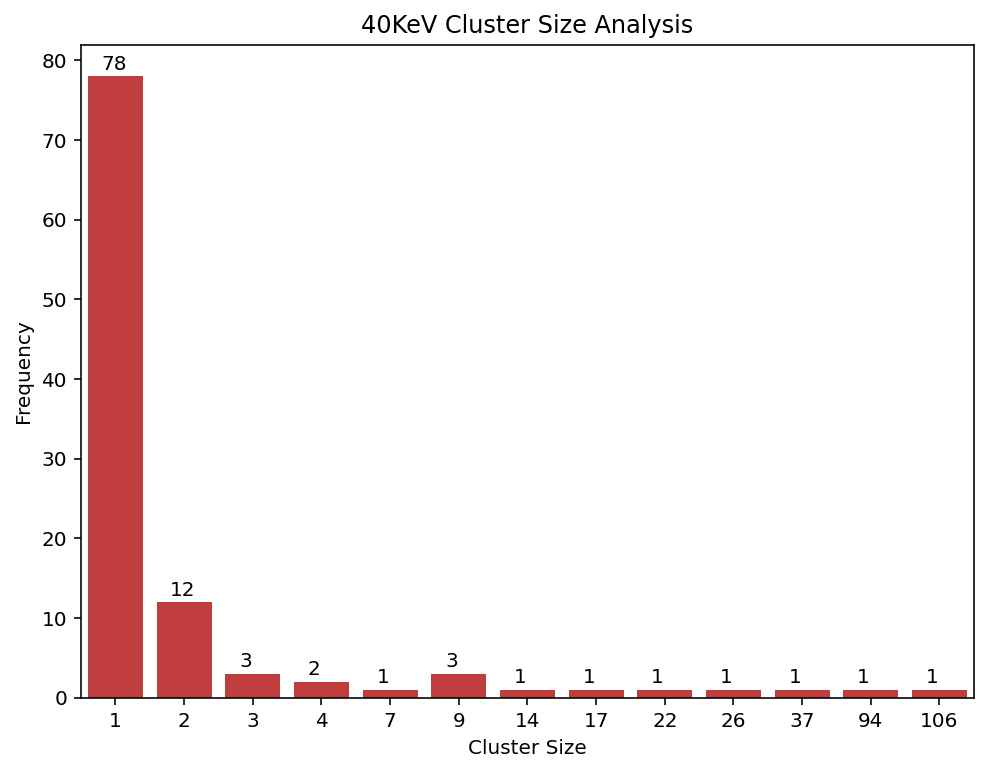

0
1
2
3
4
5
6
7
8
